In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('diabetes (3).xls')

In [3]:
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    float64
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Outcome                     0
dtype: int64

In [7]:
# Rename the columns ,it is incorrect name according to cloumns values
df.rename(columns = { 
    'Unnamed: 0' : 'Pregnancies' , 
    'Pregnancies' : 'Glucose',
    'Glucose' : 'BloodPressure',
    'BloodPressure' : 'SkinThickness',
    'SkinThickness' : 'Insulin',
    'Insulin' : 'BMI',
    'BMI' : 'DiabetesPedigreeFunction',
    'DiabetesPedigreeFunction' : 'Age'
},inplace = True)
  

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# check duplicated data is present or not
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
#remove outliers 
from scipy.stats import zscore
z=np.abs(zscore(df))
df = df[(z<3).all(axis=1)]
df.shape

(688, 9)

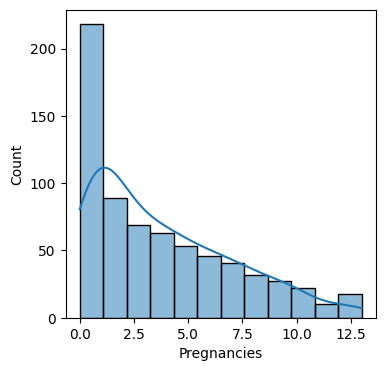

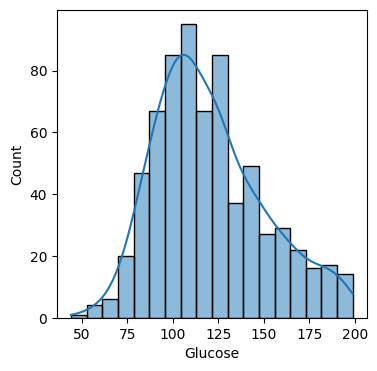

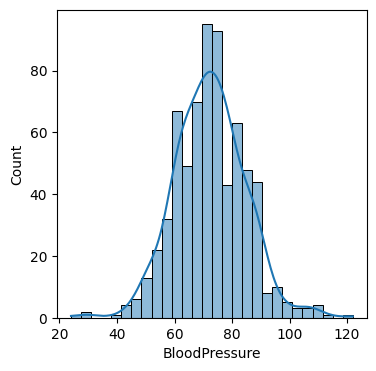

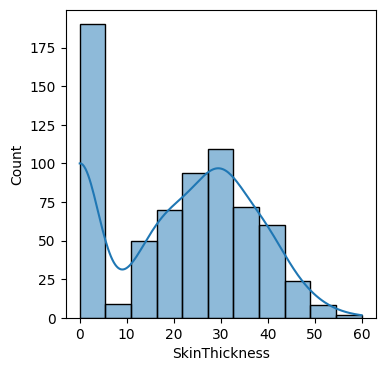

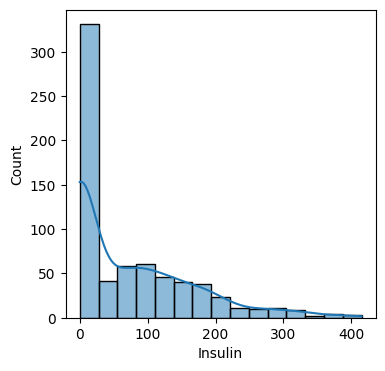

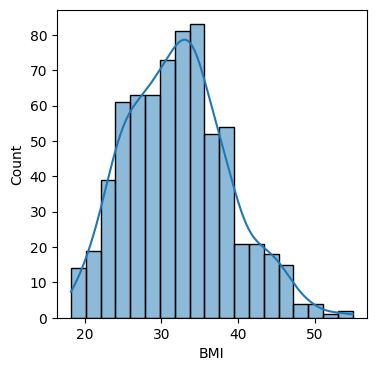

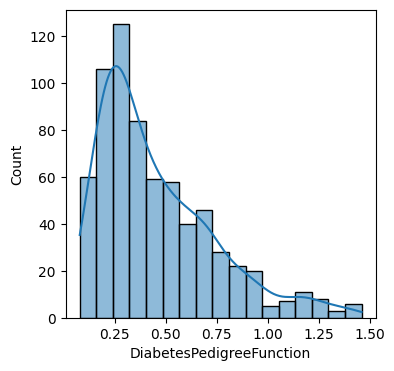

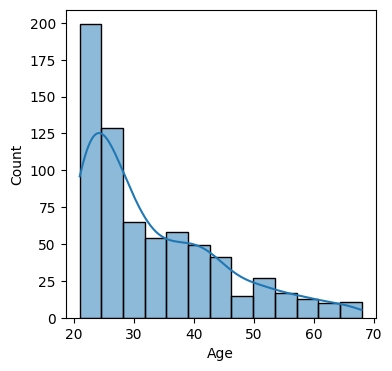

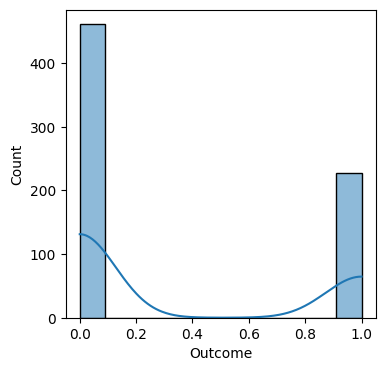

In [13]:
# distribution of features
column_name = df.columns
for i in column_name:
    plt.figure(figsize = (4,4))
    sns.histplot(df[i] ,kde=True)

In [14]:
df['Outcome'].value_counts()

Outcome
0    461
1    227
Name: count, dtype: int64

<Axes: >

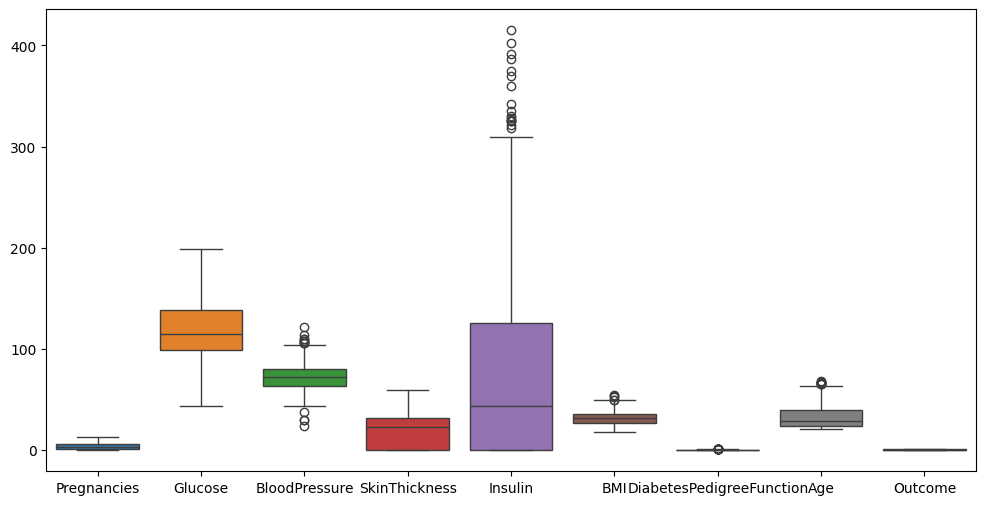

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(df)

<Axes: >

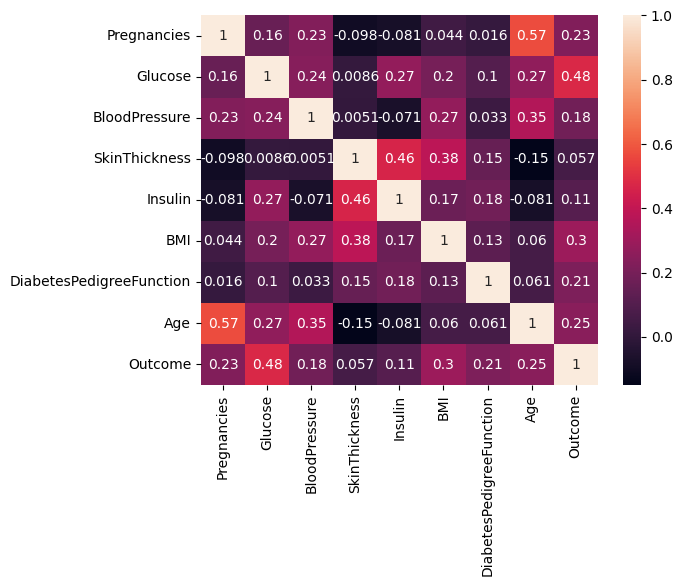

In [16]:
# correlation of each columns

sns.heatmap(df.corr(),annot =True)

In [17]:
# This garph display that BloodPressure and SkinThickness are less correlated with outcome for now we will use these features in our prediction and check accuracy.
# if we will get low accuracy with these features  at time we will remove it. 

In [19]:
print('Glucose_max :',df.Glucose.max())
print('Glucose_max :',df.Glucose.min())

Glucose_max : 199
Glucose_max : 44


In [20]:
# we are not creating the bins of Glucose level because data does not defind which time of Measure.

In [21]:
print('BloodPressure :',df.BloodPressure.max())
print('BloodPressure :',df.BloodPressure.min())

BloodPressure : 122
BloodPressure : 24


In [22]:

# for BloodPressure we create bins
# BloodPressure_replace = lambda x : 'Normal' if x<80 else ('High BP (Stage 1)'if x<89 else 'High BP (Stage 2)')
# df['BloodPressure']=df['BloodPressure'].apply(BloodPressure_replace)
# print(df['BloodPressure'].value_counts())
# sns.countplot(x=df['BloodPressure'],palette='rainbow')
# plt.show()

In [23]:

print('BMI :',df.BMI.max())
print('BMI :',df.BMI.min())

BMI : 55.0
BMI : 18.2


In [24]:
# BMI_replace = lambda x : 'Underweight' if x<18.5 else ('Healthy Weight'if x<24.9 else 'Obesity')
# df['BMI']=df['BMI'].apply(BMI_replace)
# print(df['BMI'].value_counts())
# sns.countplot(x=df['BMI'],palette='rainbow')
# plt.show()

In [25]:
df['SkinThickness'].value_counts().head()

SkinThickness
0     190
32     29
30     25
27     22
28     20
Name: count, dtype: int64

In [26]:
# SkinThickness  : 0 is high . so ,we will replace 0 with mean value
def replace_mean (column):
    df[column].replace(0, np.mean(df[column]), inplace=True)

In [27]:
replace_mean('SkinThickness')

In [28]:
# same with Insulin
df['Insulin'].value_counts().head()

Insulin
0      324
105     11
140      9
130      8
120      8
Name: count, dtype: int64

In [29]:
replace_mean('Insulin')

In [30]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,72.507267,33.6,0.627,50,1
1,1,85,66,29.000000,72.507267,26.6,0.351,31,0
2,8,183,64,20.787791,72.507267,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
5,5,116,74,20.787791,72.507267,25.6,0.201,30,0


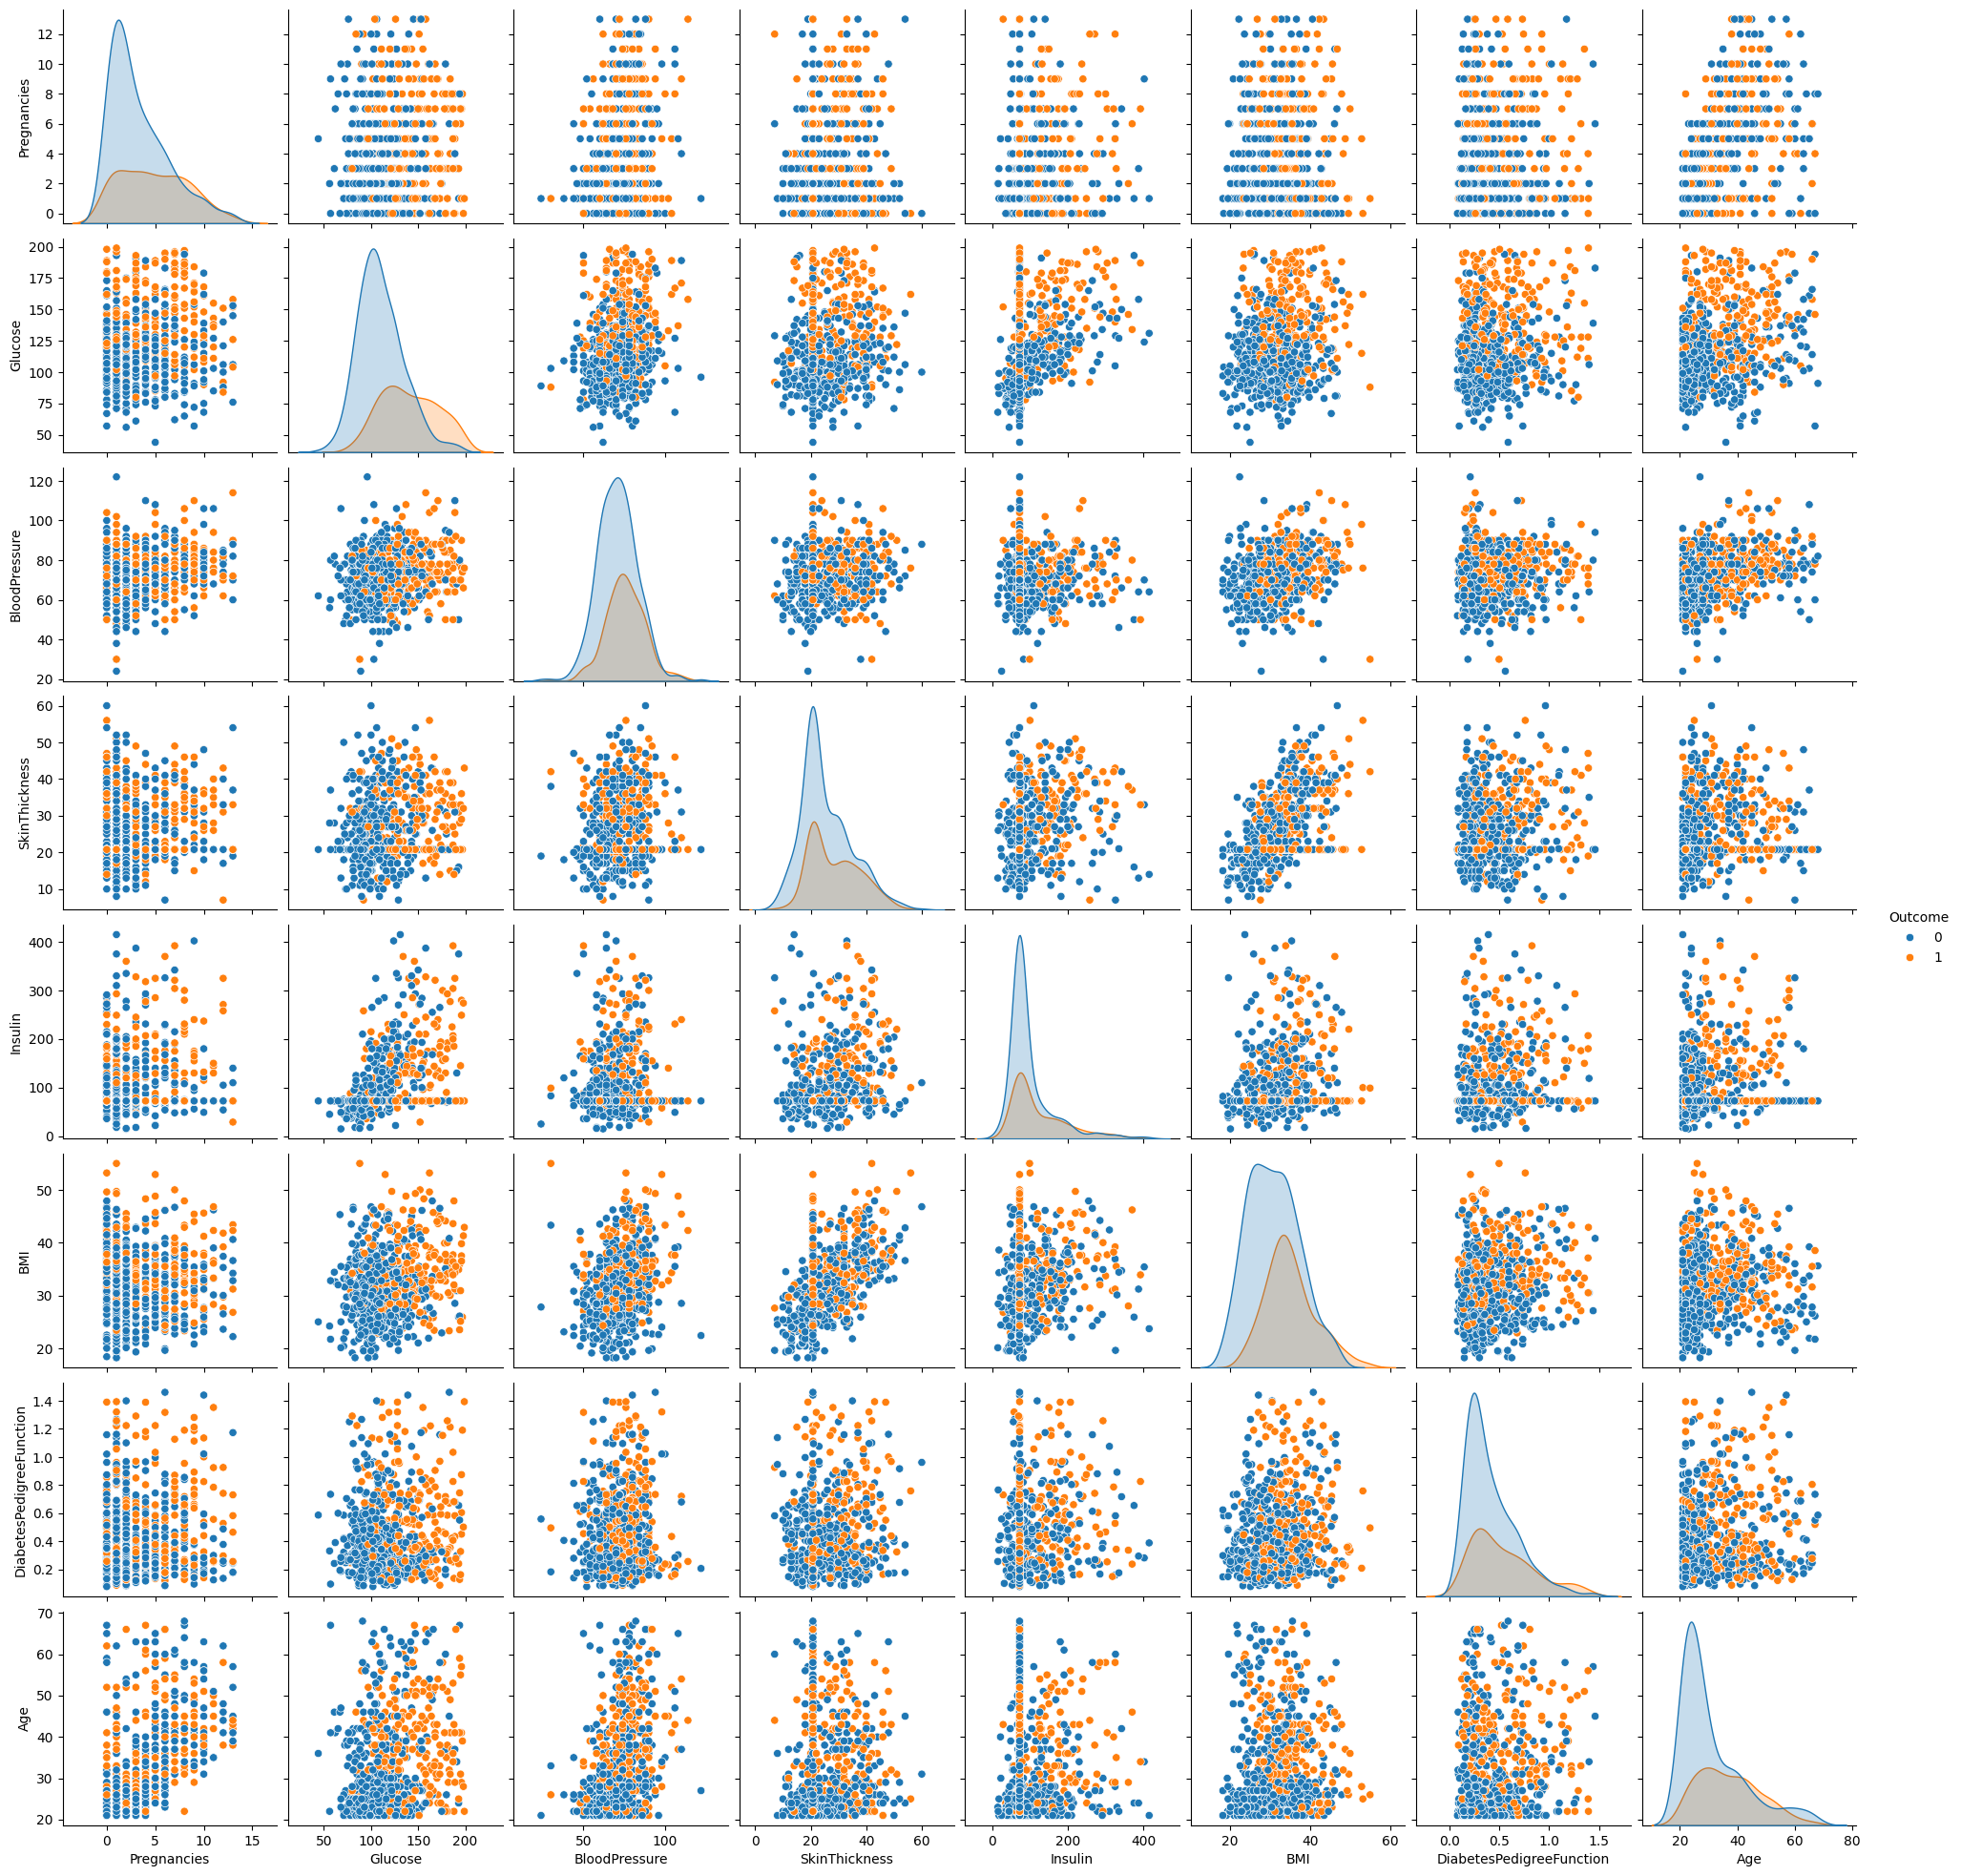

In [31]:
#pairplot
sns.pairplot(df , hue='Outcome')

In [32]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [33]:
df.shape

(688, 9)

In [34]:
# divide columns according datatype
cat = df.select_dtypes(
    include = ['object']
).columns.tolist()
cat

[]

In [35]:
num = df.select_dtypes(
    include = ['int64','float64']
).columns.tolist()
num

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [36]:
# divide features into input and target
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print('x shape :' ,x.shape)
print('y shape :',y.shape)

x shape : (688, 8)
y shape : (688,)


<Axes: xlabel='Outcome', ylabel='count'>

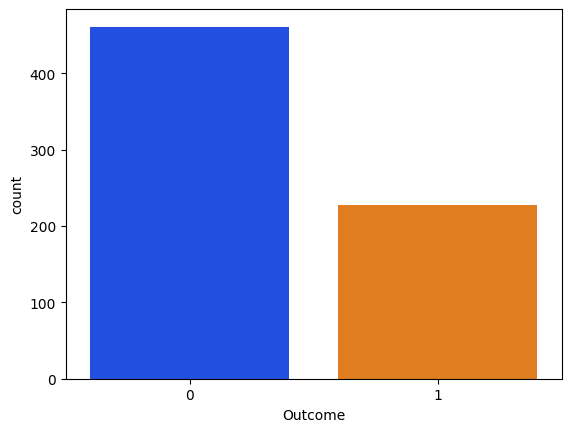

In [37]:
sns.countplot(x='Outcome',data=df,palette='bright') 

In [38]:
from imblearn.over_sampling import  SMOTE
sm = SMOTE()
x,y=sm.fit_resample(x,y)

<Axes: xlabel='Outcome', ylabel='count'>

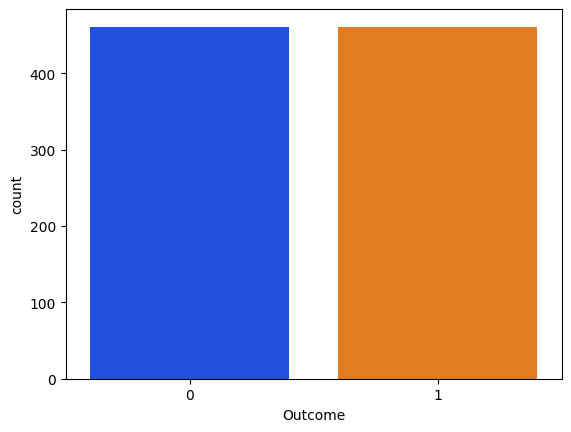

In [39]:
sns.countplot(x=y , palette = "bright")

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2 ,random_state =42)
print('x_train shape :',x_train.shape)
print('y_train shape :',y_train.shape)

x_train shape : (737, 8)
y_train shape : (737,)


In [41]:
# OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# preprocess = ColumnTransformer(
#     transformers = [
#         ('cat' , OneHotEncoder(sparse_output=False,drop='first'),cat)
#     ])
    

In [42]:
# This problem is binary classifiction so,we will import classification algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# metrics
from sklearn.metrics import accuracy_score,confusion_matrix ,classification_report
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV

In [43]:
# for model building we will use pipeline
from sklearn.pipeline import Pipeline

### LogisticRegression

In [44]:
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],  
    'logreg__penalty': ['l2'],
    'logreg__solver': ['liblinear']
}
pipe = Pipeline([
    # ('preprocess', preprocess),           
    ('logreg', LogisticRegression())      
])


grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')


grid.fit(x_train, y_train)


l_pred = grid.predict(x_test)

print('Classification Report:\n', classification_report(y_test, l_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, l_pred))
print('Accuracy Score:', accuracy_score(y_test, l_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.78      0.72        85
           1       0.78      0.67      0.72       100

    accuracy                           0.72       185
   macro avg       0.72      0.72      0.72       185
weighted avg       0.73      0.72      0.72       185

Confusion Matrix:
 [[66 19]
 [33 67]]
Accuracy Score: 0.7189189189189189


### KNeighborsClassifier

In [51]:
param_grid = {
    'knn__n_neighbors': [2, 4, 5, 6, 7],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}
pipe = Pipeline([
    # ('preprocess', preprocess),           
    ('knn', KNeighborsClassifier())      
])


grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')


grid.fit(x_train, y_train)


k_pred = grid.predict(x_test)

print('Classification Report:\n', classification_report(y_test, k_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, k_pred))
print('Accuracy Score:', accuracy_score(y_test, k_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.81      0.77        85
           1       0.82      0.75      0.79       100

    accuracy                           0.78       185
   macro avg       0.78      0.78      0.78       185
weighted avg       0.78      0.78      0.78       185

Confusion Matrix:
 [[69 16]
 [25 75]]
Accuracy Score: 0.7783783783783784


### SVC

In [52]:
param_grid = {
    'svc__kernel': ['poly'],
}
pipe = Pipeline([
    # ('preprocess', preprocess),           
    ('svc', SVC())      
])


grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')


grid.fit(x_train, y_train)


s_pred = grid.predict(x_test)

print('Classification Report:\n', classification_report(y_test, s_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, s_pred))
print('Accuracy Score:', accuracy_score(y_test, s_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.84      0.72        85
           1       0.81      0.58      0.67       100

    accuracy                           0.70       185
   macro avg       0.72      0.71      0.70       185
weighted avg       0.72      0.70      0.69       185

Confusion Matrix:
 [[71 14]
 [42 58]]
Accuracy Score: 0.6972972972972973


### GaussianNB

In [53]:
param_grid = {
    'gnb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

pipe = Pipeline([
    # ('preprocess', preprocess),           
    ('gnb', GaussianNB())      
])


grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')


grid.fit(x_train, y_train)


g_pred = grid.predict(x_test)

print('Classification Report:\n', classification_report(y_test, g_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, g_pred))
print('Accuracy Score:', accuracy_score(y_test, g_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.79      0.71        85
           1       0.78      0.64      0.70       100

    accuracy                           0.71       185
   macro avg       0.72      0.71      0.71       185
weighted avg       0.72      0.71      0.71       185

Confusion Matrix:
 [[67 18]
 [36 64]]
Accuracy Score: 0.7081081081081081


###  DecisionTreeClassifier

In [54]:
param_grid = {
    'dt__criterion': [ 'entropy'],
    'dt__max_depth': [ 3, 5, 10],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4]
}

pipe = Pipeline([
    # ('preprocess', preprocess),           
    ('dt',  DecisionTreeClassifier())      
])


grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')


grid.fit(x_train, y_train)


d_pred = grid.predict(x_test)

print('Classification Report:\n', classification_report(y_test, d_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, d_pred))
print('Accuracy Score:', accuracy_score(y_test, d_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.80      0.76        85
           1       0.81      0.73      0.77       100

    accuracy                           0.76       185
   macro avg       0.76      0.77      0.76       185
weighted avg       0.77      0.76      0.76       185

Confusion Matrix:
 [[68 17]
 [27 73]]
Accuracy Score: 0.7621621621621621


### GradientboostClassifier


In [88]:
from sklearn.ensemble import GradientBoostingClassifier

pipe = Pipeline([
    # ('preprocess', preprocess),           
    ('gc',  GradientBoostingClassifier(n_estimators=120,learning_rate=0.1,max_depth=3,random_state=42))      
])

pipe.fit(x_train, y_train)


gc_pred = pipe.predict(x_test)

print('Classification Report:\n', classification_report(y_test, gc_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, gc_pred))
print('Accuracy Score:', accuracy_score(y_test, gc_pred))
print('cross_val_score :', np.mean(cross_val_score(pipe ,x_train ,y_train ,cv=5)))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78        85
           1       0.82      0.81      0.81       100

    accuracy                           0.80       185
   macro avg       0.80      0.80      0.80       185
weighted avg       0.80      0.80      0.80       185

Confusion Matrix:
 [[67 18]
 [19 81]]
Accuracy Score: 0.8
cross_val_score : 0.7857326714469571


### Voting

In [94]:
from sklearn.ensemble import VotingClassifier

gb =GaussianNB()
knn =KNeighborsClassifier()
lr=LogisticRegression()


estimators = [ ('gb',gb) ,('knn',knn) ,('lr',lr)]

pipe = Pipeline([
     # ('preprocess', preprocess),
    ('vc' , VotingClassifier(estimators=estimators ,voting='soft',weights=[2,5,1]))
])

pipe.fit(x_train, y_train)

vc_pred = pipe.predict(x_test)

print('Classification Report:\n', classification_report(y_test, vc_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, vc_pred))
print('Accuracy Score:', accuracy_score(y_test, vc_pred))
print('cross_val_score :', np.mean(cross_val_score(pipe ,x_train ,y_train ,cv=5)))
    

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.69      0.73        85
           1       0.76      0.83      0.79       100

    accuracy                           0.77       185
   macro avg       0.77      0.76      0.76       185
weighted avg       0.77      0.77      0.77       185

Confusion Matrix:
 [[59 26]
 [17 83]]
Accuracy Score: 0.7675675675675676
cross_val_score : 0.7503585217870932


### Stacking

In [100]:
from sklearn.ensemble import StackingClassifier

dt =DecisionTreeClassifier()
knn =KNeighborsClassifier()
lr=LogisticRegression()

estimators = [ ('dt',dt) ,('knn',knn) ,('lr',lr)]
final_estimator = DecisionTreeClassifier()


pipe = Pipeline([
# ('preprocess', preprocess),
('st' , StackingClassifier(estimators=estimators,final_estimator =final_estimator,cv=10))
])

pipe.fit(x_train, y_train)

sc_pred = pipe.predict(x_test)

print('Classification Report:\n', classification_report(y_test, sc_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, sc_pred))
print('Accuracy Score:', accuracy_score(y_test, sc_pred))
print('cross_val_score :', np.mean(cross_val_score(pipe ,x_train ,y_train ,cv=5)))
    

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.71      0.68        85
           1       0.73      0.68      0.70       100

    accuracy                           0.69       185
   macro avg       0.69      0.69      0.69       185
weighted avg       0.69      0.69      0.69       185

Confusion Matrix:
 [[60 25]
 [32 68]]
Accuracy Score: 0.6918918918918919
cross_val_score : 0.6920665563522708


### RandomForestClassifier

In [104]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    # ('preprocess', preprocess),           
    ('rf',  RandomForestClassifier(n_estimators=130,criterion='entropy',min_samples_split=3))      
])

pipe.fit(x_train, y_train)


r_pred = pipe.predict(x_test)

print('Classification Report:\n', classification_report(y_test, r_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, r_pred))
print('Accuracy Score:', accuracy_score(y_test, r_pred))
print('cross_val_score :', np.mean(cross_val_score(pipe ,x_train ,y_train ,cv=5)))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81        85
           1       0.84      0.83      0.83       100

    accuracy                           0.82       185
   macro avg       0.82      0.82      0.82       185
weighted avg       0.82      0.82      0.82       185

Confusion Matrix:
 [[69 16]
 [17 83]]
Accuracy Score: 0.8216216216216217
cross_val_score : 0.8074002574002573


In [105]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

##### RandomForestClassifier is give best accuracy among all algorithms

## Prediction 

In [109]:
file=pickle.load(open('pipe.pkl', 'rb'))
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [110]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [137]:
def predict ():
    Pregnancies=int(input('enter your Pregnancies count :'))
    Glucose=int(input('enter your Glucose level :'))
    BloodPressure=int(input('enter your BloodPressure level :'))
    SkinThickness = float(input('enter your SkinThickness :'))
    Insulin = float(input('enter your Insulin level :'))
    BMI  = float(input('enter your BMI  score :'))
    DiabetesPedigreeFunction  = float(input('enter your DiabetesPedigreeFunction  score :'))
    Age  = int(input('enter your Age :'))
    
    new_data = pd.DataFrame([{'Pregnancies':Pregnancies,
                             'Glucose':Glucose,
                             'BloodPressure':BloodPressure,
                             'SkinThickness':SkinThickness,
                             'Insulin':Insulin,
                             'BMI':BMI,
                             'DiabetesPedigreeFunction':DiabetesPedigreeFunction,
                             'Age':Age}])
    pred_output=file.predict(new_data)
                             
    if pred_output == 1 :
        print ("Your diabetes report is positive")
    else:
        print ("Your diabetes report is negative")
    
  
    
    

In [138]:
predict()

enter your Pregnancies count : 1
enter your Glucose level : 199
enter your BloodPressure level : 76
enter your SkinThickness : 43
enter your Insulin level : 72.50
enter your BMI  score : 42.9
enter your DiabetesPedigreeFunction  score : 1.394
enter your Age : 22


Your diabetes report is positive


In [139]:
predict()

enter your Pregnancies count : 8
enter your Glucose level : 107
enter your BloodPressure level : 80
enter your SkinThickness : 20.78
enter your Insulin level : 72.50
enter your BMI  score : 24.6
enter your DiabetesPedigreeFunction  score : 0.856
enter your Age : 34


Your diabetes report is negative


In [135]:
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43.000000,72.507267,42.9,1.394,22,1
690,8,107,80,20.787791,72.507267,24.6,0.856,34,0
36,11,138,76,20.787791,72.507267,33.2,0.420,35,0
